In [12]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount ('/content/drive/') 

Mounted at /content/drive/


In [14]:
df =pd.read_csv('/content/drive/My Drive/Colab Notebooks/TIME_SERIES/us-airlines-monthly-aircraft-miles-flown.csv',header=0,parse_dates=[0])

In [4]:
df.head()

,Month,MilesMM
0,1963-01,6827
1,1963-02,6178
2,1963-03,7084
3,1963-04,8162
4,1963-05,8462


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Month    96 non-null     object
 1   MilesMM  96 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.6+ KB


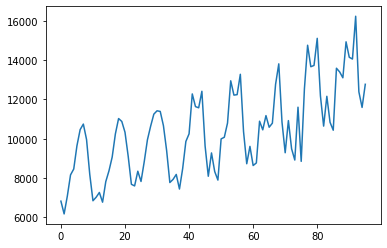

In [6]:
df['MilesMM'].plot()

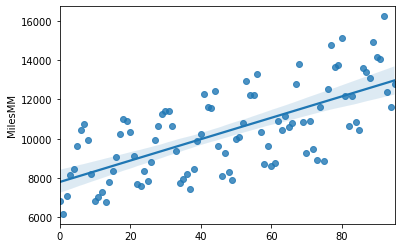

In [7]:
sns.regplot(x=df.index.values,y=df['MilesMM'])

Removing Seasonality

In [15]:
df['year']=df['Month'].dt.year

In [16]:
df.head()

,Month,MilesMM,year
0,1963-01-01,6827,1963
1,1963-02-01,6178,1963
2,1963-03-01,7084,1963
3,1963-04-01,8162,1963
4,1963-05-01,8462,1963


In [17]:
df.groupby('year')['MilesMM'].mean()

year
1963     8300.250000
1964     8849.333333
1965     9619.250000
1966     9929.500000
1967    10542.916667
1968    10747.916667
1969    11972.000000
1970    13124.750000
Name: MilesMM, dtype: float64

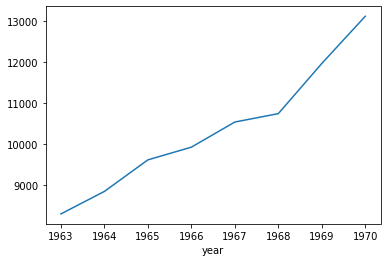

In [18]:
df.groupby('year')['MilesMM'].mean().plot()

Lag Plot

In [19]:
df['lag']=df['MilesMM'].shift(1)
df.head()

,Month,MilesMM,year,lag
0,1963-01-01,6827,1963,NaN
1,1963-02-01,6178,1963,6827.0
2,1963-03-01,7084,1963,6178.0
3,1963-04-01,8162,1963,7084.0
4,1963-05-01,8462,1963,8162.0


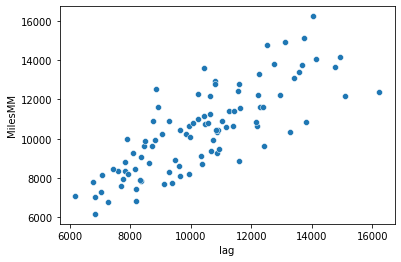

In [20]:
sns.scatterplot(x=df['lag'],y=df['MilesMM'])

In [21]:
from pandas.plotting import lag_plot

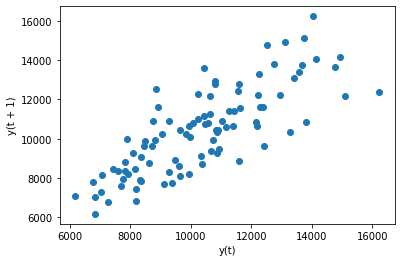

In [22]:
lag_plot(df['MilesMM'])

Autocorrelation plots

In [23]:
from pandas.plotting import autocorrelation_plot

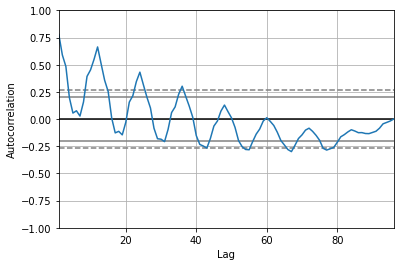

In [24]:
autocorrelation_plot(df['MilesMM'])